In [4]:
import japanize_matplotlib  # noqa
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["font.size"] = 25
plt.rcParams["xtick.labelsize"] = 25
plt.rcParams["ytick.labelsize"] = 25
plt.rcParams["axes.labelsize"] = 25
plt.rcParams["axes.titlesize"] = 30

METRICS = [
    "exec_time",
    "user_util",
    "nsw",
    "mean_max_envy",
    "pct_item_util_better",
    "pct_item_util_worse",
]
METRICS_MAP = {
    "exec_time": "実行時間 (秒)",
    "user_util": "ユーザー満足度",
    "nsw": "NSW",
    "mean_max_envy": "Mean Max Envy",
    "pct_item_util_better": "% Items Better Off",
    "pct_item_util_worse": "% Items Worse Off",
}

In [5]:
number_of_params = [250000, 500000, 1000000, 2000000, 4000000, 8000000]
result_df = pd.read_csv("../output/result.csv").query('optimizer_params_method != "pg_ot"')
result_df["number_of_params"] = (
    result_df["generator_n_doc"] * result_df["generator_n_query"] * result_df["generator_K"]
)
result_df = (
    result_df.reset_index(drop=True)
    .query("number_of_params in @number_of_params")
    .reset_index(drop=True)
)
# result_df["optimizer_params_method"] = " (" + result_df["optimizer_params_method"] + ")"
result_df["method"] = result_df[
    "optimizer_name"
]  # + result_df["optimizer_params_method"].fillna("")

result_df = result_df[result_df[METRICS].notna().all(axis=1)].reset_index(drop=True)

ideal_df = result_df.query('method == "nsw"').reset_index(drop=True)

result_df = pd.merge(
    result_df[["number_of_params", "seed", "method"] + METRICS],
    ideal_df[["number_of_params", "seed"] + METRICS],
    on=["number_of_params", "seed"],
    suffixes=("", "_nsw"),
    how="left",
)
# result_df["exec_time"] = result_df["exec_time"] / result_df["exec_time_nsw"]

# result_df = result_df.groupby(["number_of_params", "method"], as_index=False)[METRICS].mean()

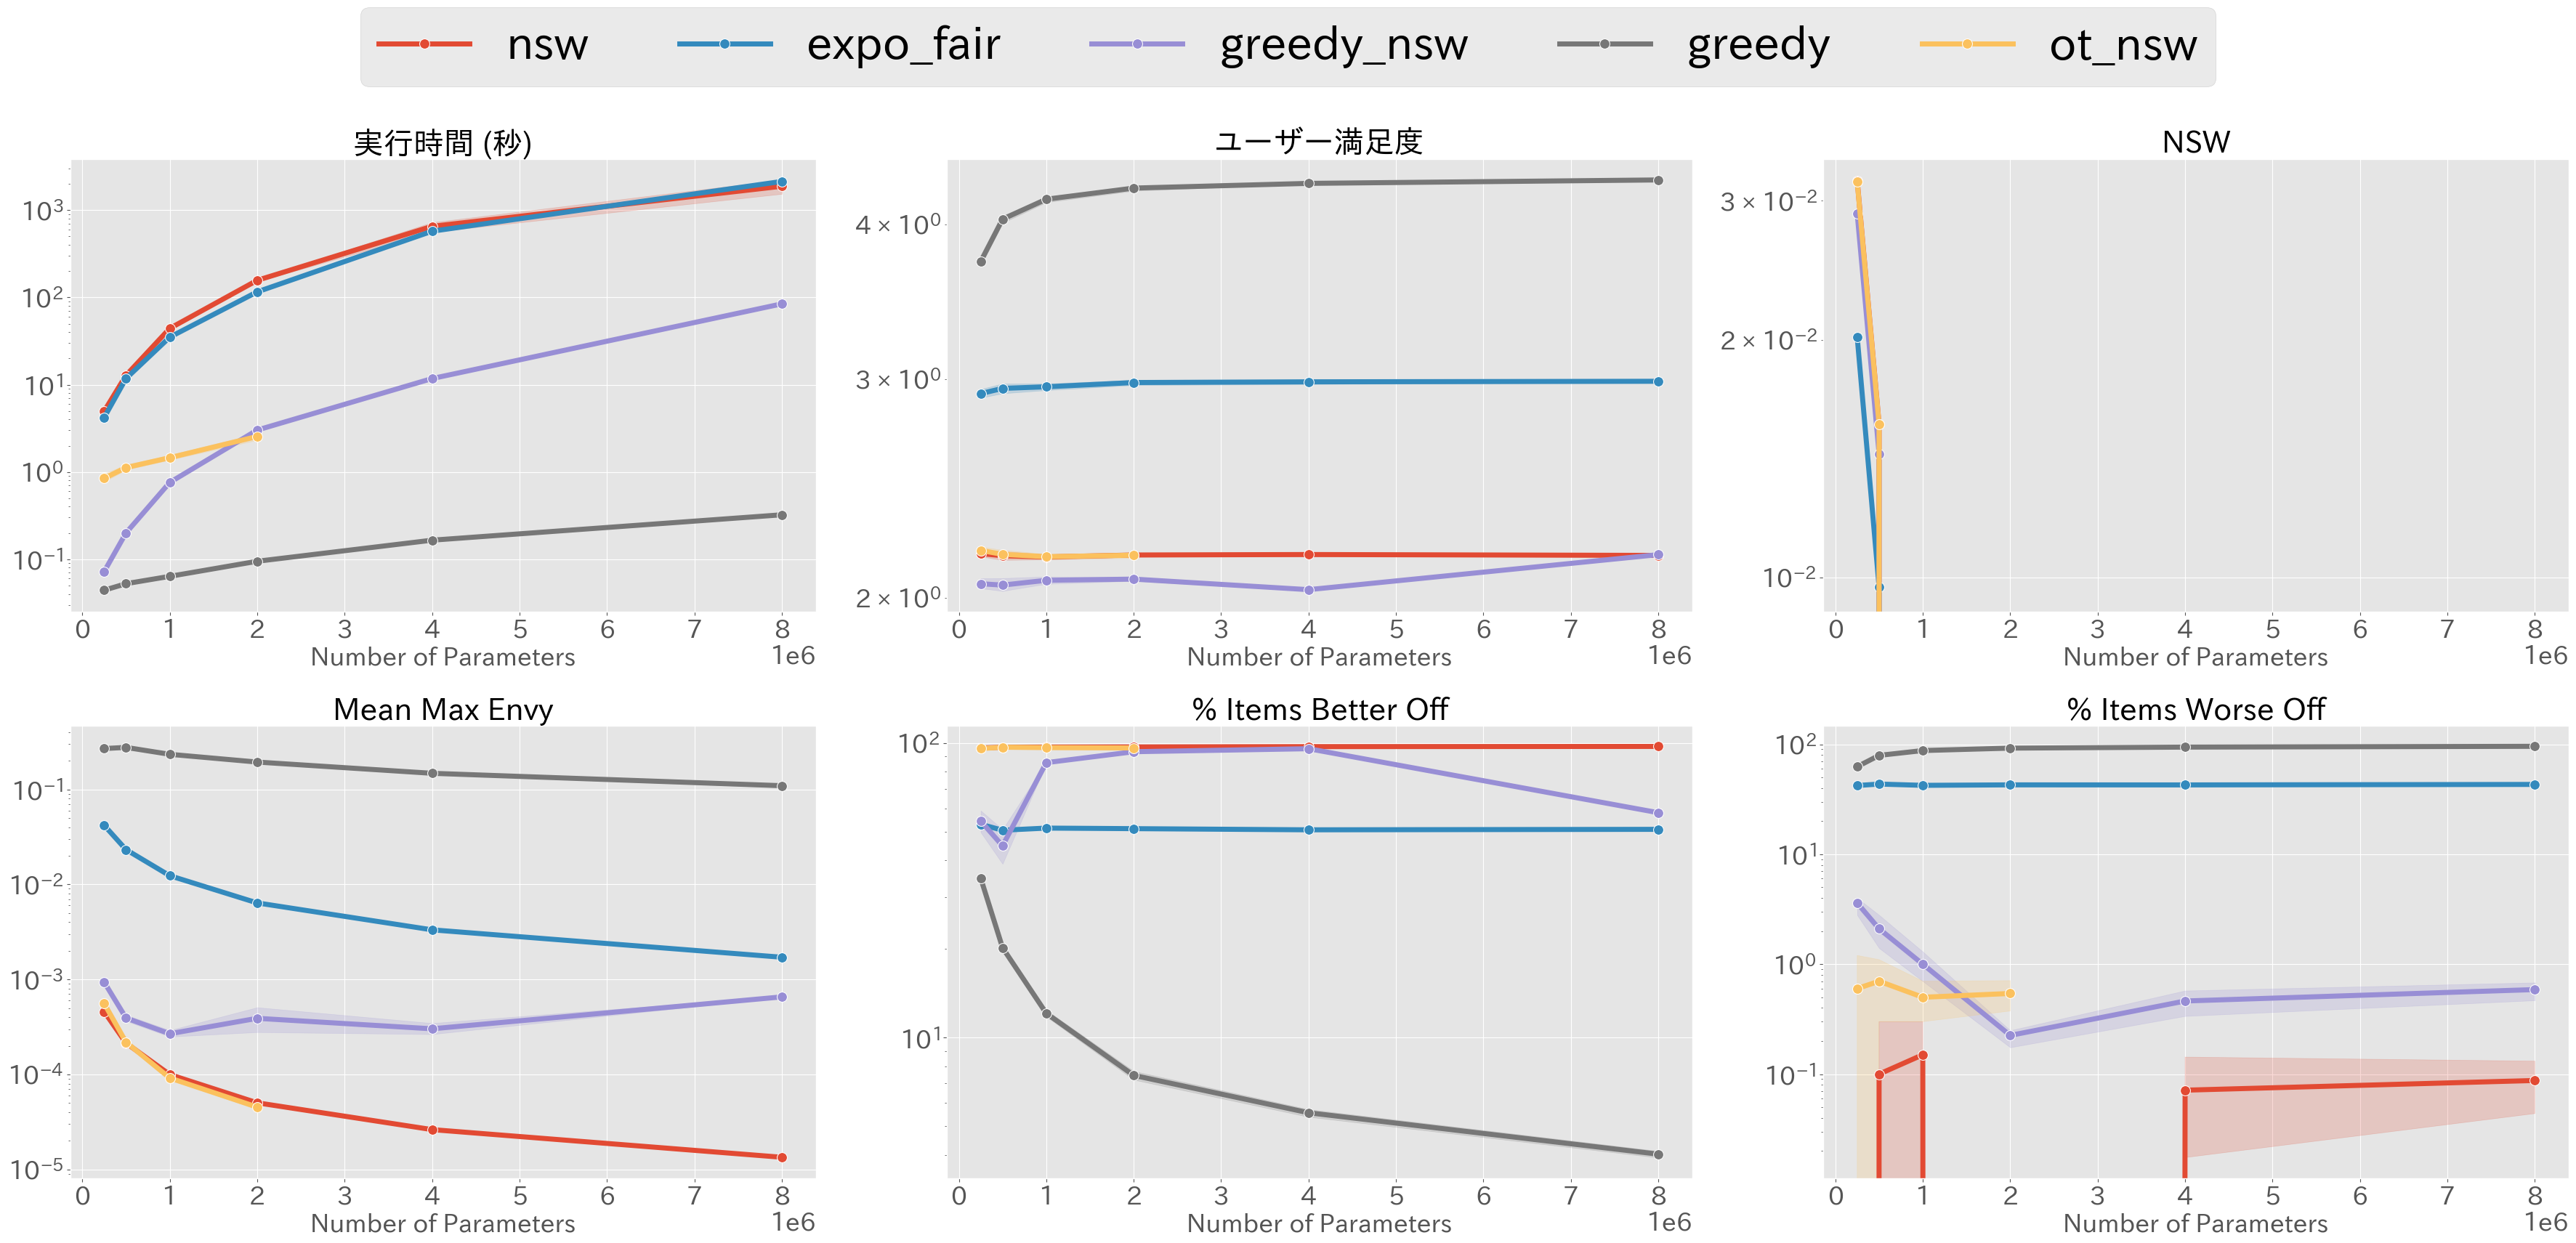

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12 * 3, 8 * 2))
axes = np.ravel(axes)
for i, metric in enumerate(METRICS):
    ax = sns.lineplot(
        result_df,
        x="number_of_params",
        y=metric,
        hue="method",
        ax=axes[i],
        marker="o",
        markers=True,
        markersize=10,
        linewidth=5,
        legend=True if i == 0 else False,
    )
    if i == 0:
        legend = ax.legend()
        ax.get_legend().remove()
    ax.set_title(METRICS_MAP[metric])
    ax.set_ylabel("")
    ax.set_xlabel("Number of Parameters")

    # if metric == "exec_time":
    ax.set_yscale("log")

fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=5, fontsize=45)
fig.tight_layout()

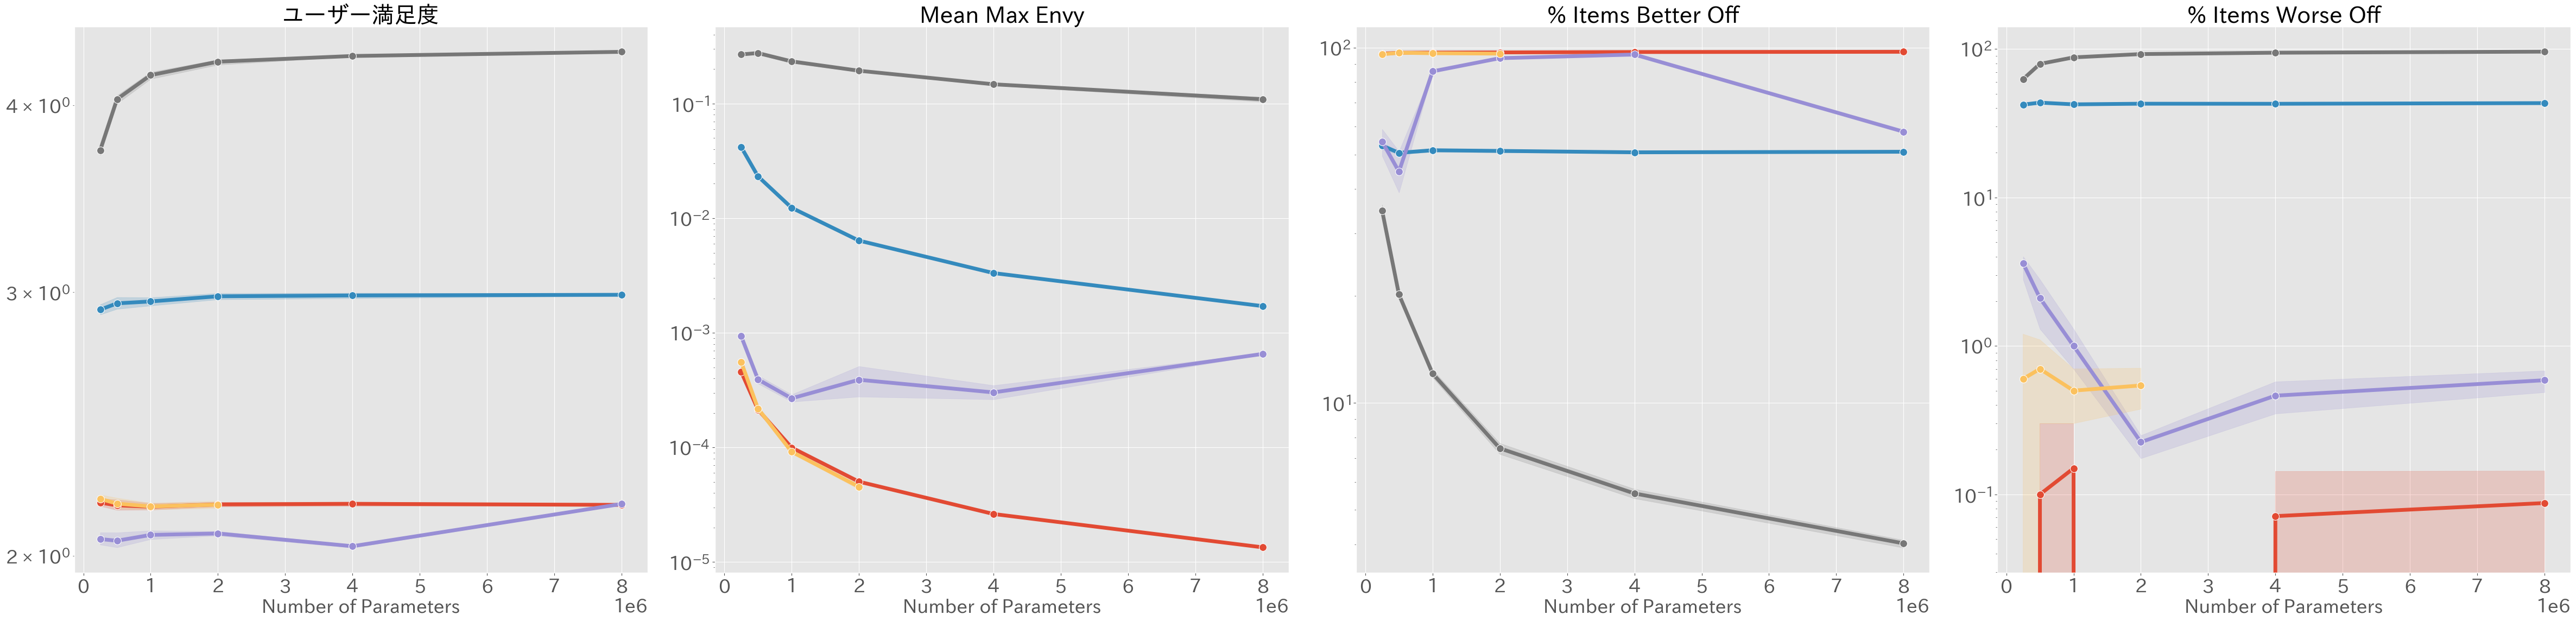

In [7]:
fig, axes = plt.subplots(ncols=4, figsize=(12 * 4, 12 * 1))
axes = np.ravel(axes)
for i, metric in enumerate(
    ["user_util", "mean_max_envy", "pct_item_util_better", "pct_item_util_worse"]
):
    ax = sns.lineplot(
        result_df,
        x="number_of_params",
        y=metric,
        hue="method",
        ax=axes[i],
        marker="o",
        markers=True,
        markersize=10,
        linewidth=5,
        legend=False,
    )
    ax.set_title(METRICS_MAP[metric])
    ax.set_ylabel("")
    ax.set_xlabel("Number of Parameters")

    # if metric == "pct_item_util_better" or metric == "pct_item_util_worse":
    #     ax.set_ylim(0, 100)
    # else:
    #     ax.set_yscale("log")
    ax.set_yscale("log")

# fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, fontsize=30)
fig.tight_layout()

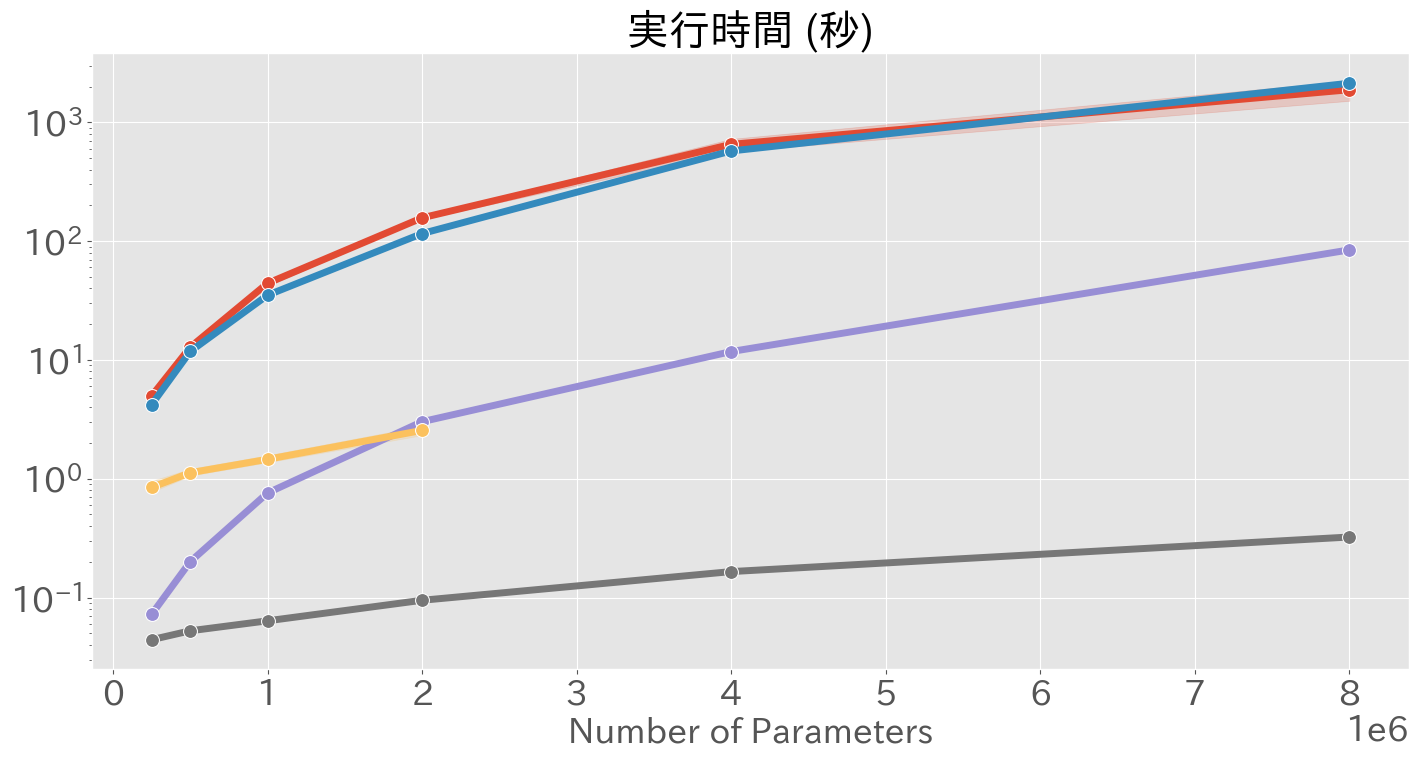

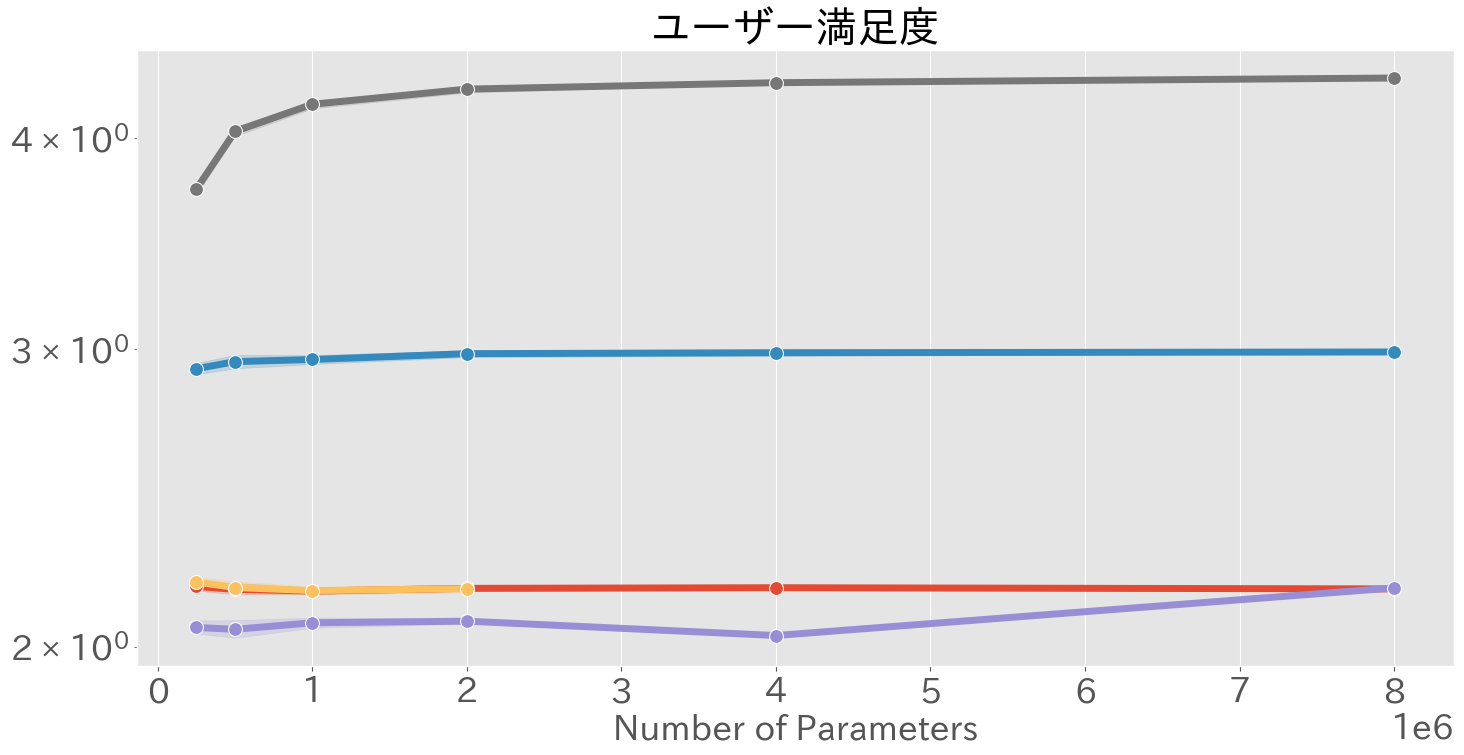

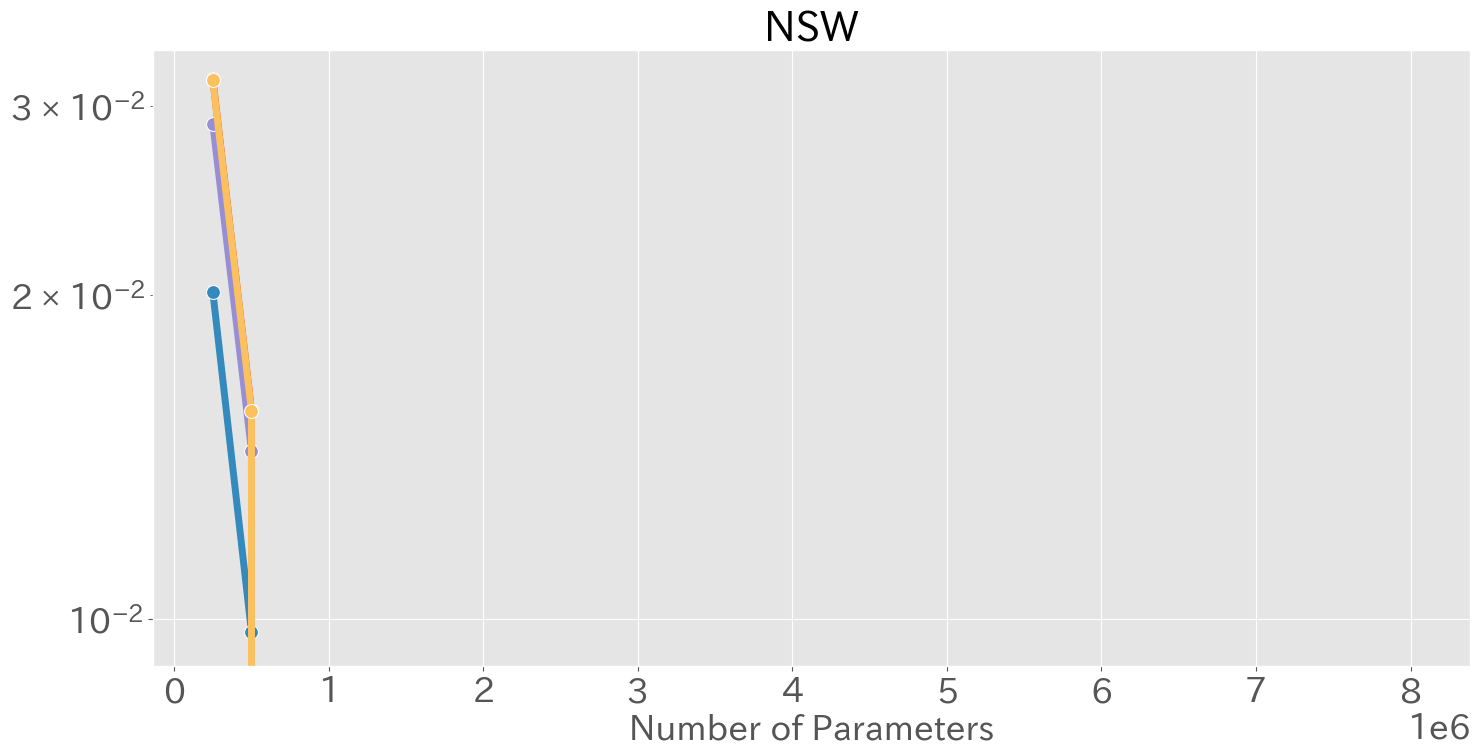

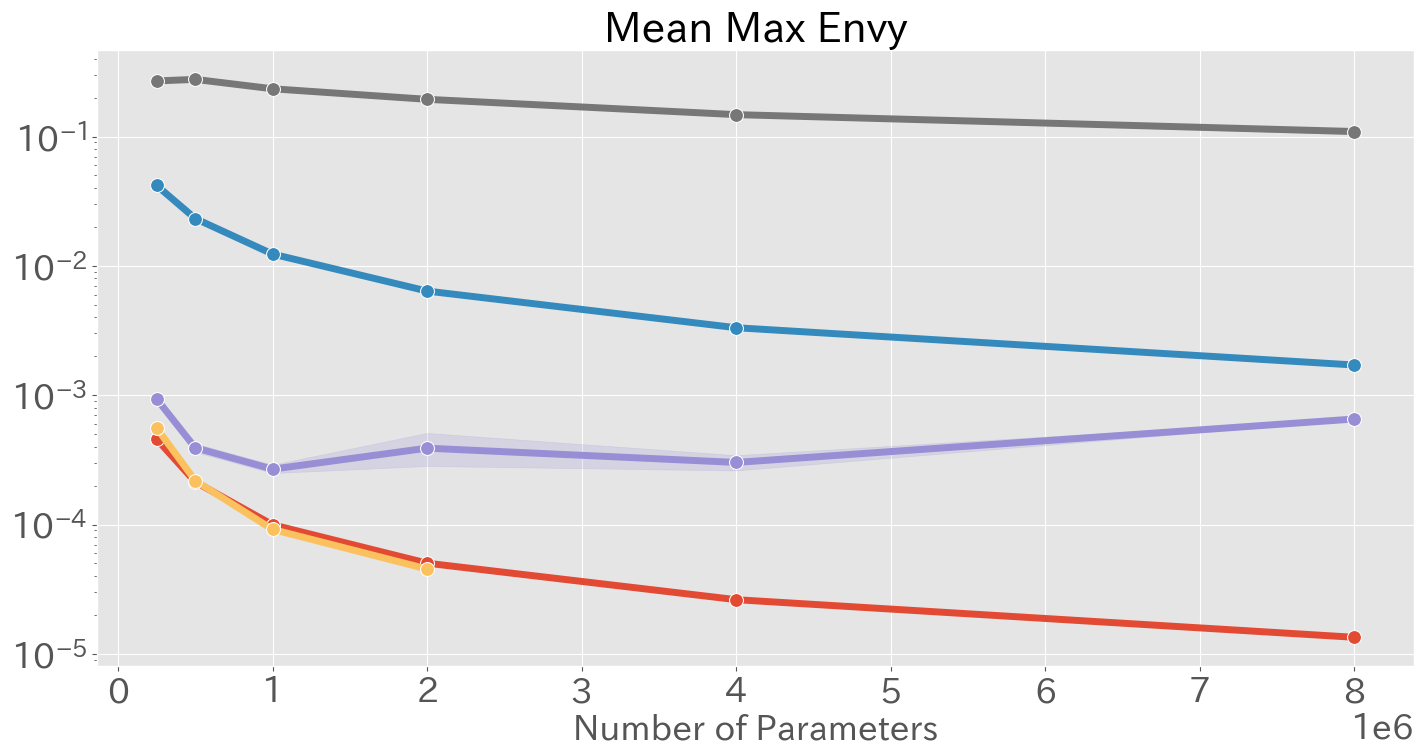

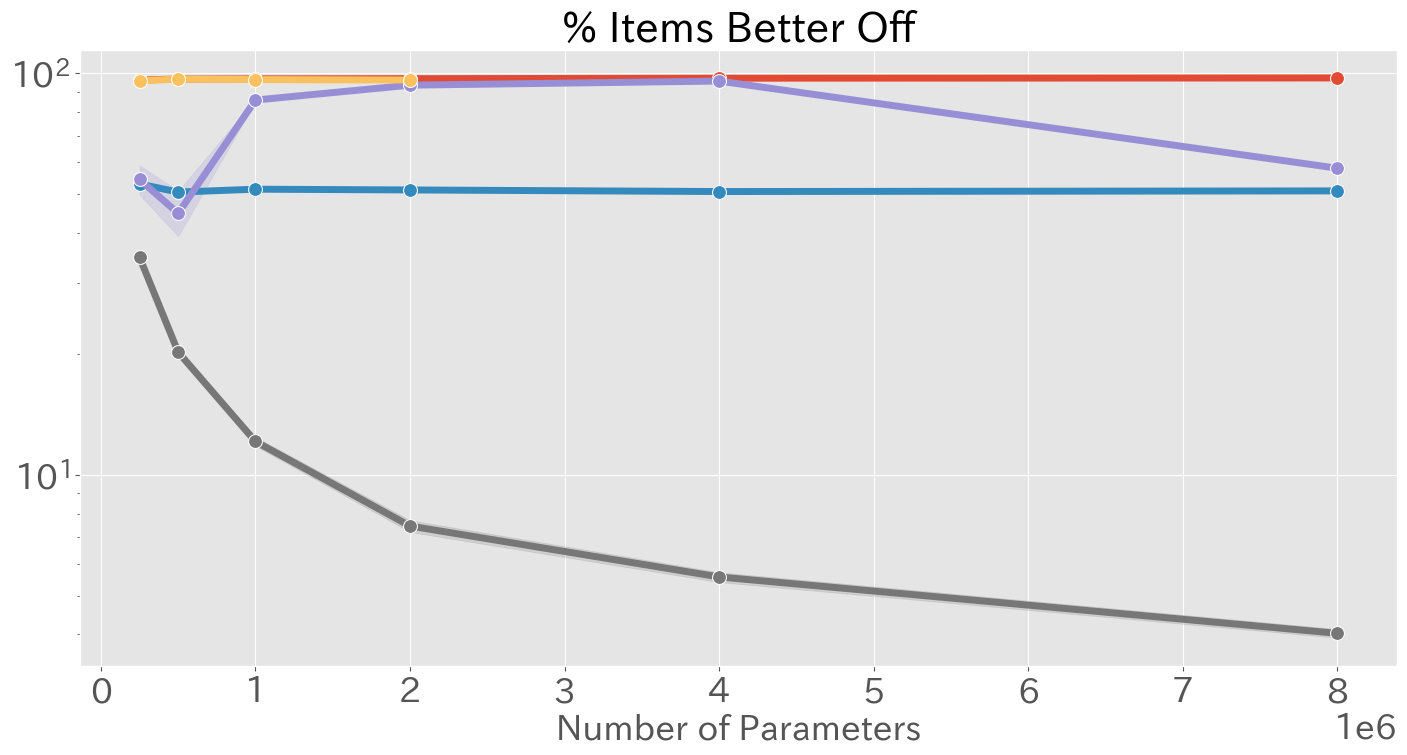

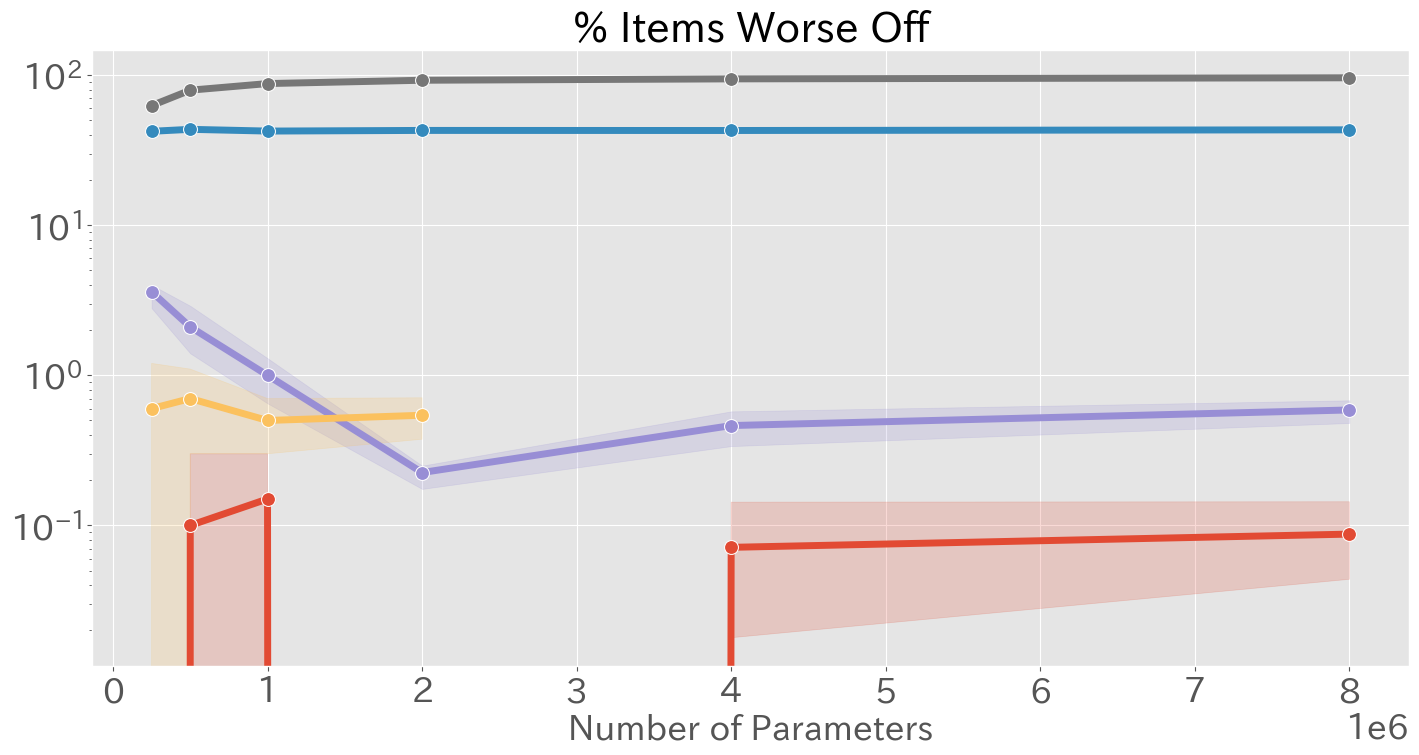

In [8]:
for i, metric in enumerate(METRICS):
    fig = plt.figure(figsize=(17, 8))
    ax = sns.lineplot(
        result_df,
        x="number_of_params",
        y=metric,
        hue="method",
        marker="o",
        markers=True,
        markersize=10,
        linewidth=5,
        legend=False,
    )
    ax.set_title(METRICS_MAP[metric])
    ax.set_ylabel("")
    ax.set_xlabel("Number of Parameters")

    # if metric == "exec_time":
    ax.set_yscale("log")

# fig.legend(loc="upper center", bbox_to_anchor=(0.5, 1.1), ncol=3, fontsize=30)
# fig.tight_layout()

In [9]:
from matplotlib import pyplot as plt

# 現在のカラーサイクルから色を取得
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# 色を表示
print("Color codes from the current color cycle:")
for color in colors:
    print(color)

Color codes from the current color cycle:
#E24A33
#348ABD
#988ED5
#777777
#FBC15E
#8EBA42
#FFB5B8
